# Importing Required Packages of Python

In [1]:
from datetime import date
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import os
import warnings
warnings.filterwarnings("ignore")

# Declaring Global Variables

In [2]:
DATE_UPDATE = str(date.today().strftime('%m-%d-%Y'))

# Importing Data from Daily Report Files

In [3]:
def importfiles():
    files_list = [file for file in os.listdir('./csse_covid_19_daily_reports/') if file.endswith('.csv')]

    COVID_DATA_df = pd.DataFrame(columns = ['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered'])
    
    for file in files_list:
        file_path = './csse_covid_19_daily_reports/' + file
        temp_df = pd.read_csv(file_path)
        temp_df.columns = temp_df.columns.str.replace('Province_State', 'Province/State')
        temp_df.columns = temp_df.columns.str.replace('Country_Region', 'Country/Region')
        temp_df.columns = temp_df.columns.str.replace('Last_Update', 'Last Update')
        temp_df = temp_df.fillna(0)
        temp_df['Country/Region'] = temp_df['Country/Region'].replace('Mainland China','China')
        temp_df = temp_df[['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]
        temp_df['Last Update'] = str(file.split('.')[0])
        COVID_DATA_df = pd.concat([COVID_DATA_df,temp_df], ignore_index=True, axis=0)
    return COVID_DATA_df

In [4]:
def cities_usa_importfiles():
    files_list = [file for file in os.listdir('./csse_covid_19_daily_reports/') if file.endswith('.csv')]

    COVID_DATA_df = pd.DataFrame(columns = ['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered','Admin2'])
    
    index_pos = files_list.index('03-22-2020.csv')
    for file in files_list[index_pos:]:
        file_path = './csse_covid_19_daily_reports/' + file
        temp_df = pd.read_csv(file_path)
        temp_df.columns = temp_df.columns.str.replace('Province_State', 'Province/State')
        temp_df.columns = temp_df.columns.str.replace('Country_Region', 'Country/Region')
        temp_df.columns = temp_df.columns.str.replace('Last_Update', 'Last Update')
        temp_df = temp_df[temp_df['Country/Region']=='US']
        temp_df = temp_df.fillna(0)
        temp_df['Country/Region'] = temp_df['Country/Region'].replace('Mainland China','China')
        temp_df = temp_df[['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered','Admin2']]
        temp_df['Last Update'] = str(file.split('.')[0])
        COVID_DATA_df = pd.concat([COVID_DATA_df,temp_df], ignore_index=True, axis=0)
    COVID_DATA_df.columns = COVID_DATA_df.columns.str.replace('Admin2', 'City')
    return COVID_DATA_df

# Plotting Information of 10 Countries/States/Cities with Highest CoronaVirus Cases As of Today

In [5]:
def country_wise_count(COVID_DATA_df, country=None, state=None):
    df = COVID_DATA_df[COVID_DATA_df['Last Update'].str.contains(DATE_UPDATE)]
    if state is not None:
        selection_column = 'City'
        df = df[df['Province/State']==state]
    elif country is not None:
        selection_column = 'Province/State'
        df = df[df['Country/Region']==country]
    else:
        selection_column = 'Country/Region'

    df = df.groupby([selection_column]).agg({'Confirmed':['sum'], 'Deaths':['sum'], 'Recovered':['sum']})
    df = df.reset_index()
    df.columns = df.columns.droplevel(1)
    df = df.sort_values(by=['Confirmed'], ascending=False)
    df = df[:5]
    return df

In [6]:
def country_wise_count_plot(COVID_DATA_df, country=None, state=None):
    plt.figure(figsize=(10,5), dpi=100)
    if state is not None:
        selection_column = 'City'
        df = country_wise_count(COVID_DATA_df, country,state)
        x_label_value = state + ' Cities'
        end_label = ' in top 5 cities of ' + state
    elif country is not None:
        selection_column = 'Province/State'
        df = country_wise_count(COVID_DATA_df, country)
        x_label_value = country + ' States'
        end_label = ' in top 5 states of ' + country
    else:
        selection_column = 'Country/Region'
        df = country_wise_count(COVID_DATA_df)
        x_label_value = 'Countries'
        end_label = ' in top 5 countries in the world'
        
    ax = sns.pointplot(x=selection_column, y='Confirmed', data=df, join=False, label='Confirmed')
    sns.pointplot(x=selection_column, y='Recovered', data=df, join=False, color='green', ax=ax, label='Recovered')
    sns.pointplot(x=selection_column, y='Deaths', data=df, join=False, color='red', ax=ax, label='Deaths')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title('Cases of CoronaVirus as on '+DATE_UPDATE + end_label)
    ax.set(xlabel=x_label_value, ylabel='Count')
    blue_patch = mpatches.Patch(color='blue', label='Confirmed')
    green_patch = mpatches.Patch(color='green', label='Recovered')
    red_patch = mpatches.Patch(color='red', label='Deaths')
    plt.legend(handles=[blue_patch, green_patch, red_patch])
    plt.show()

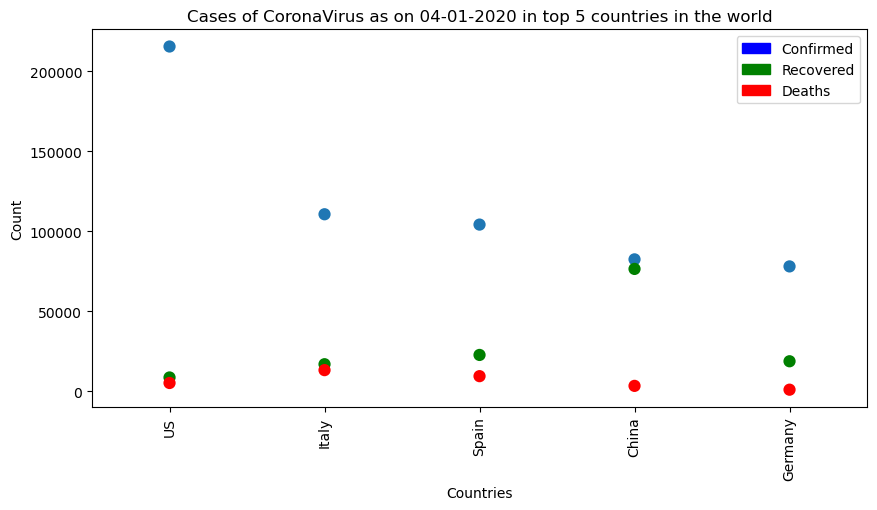

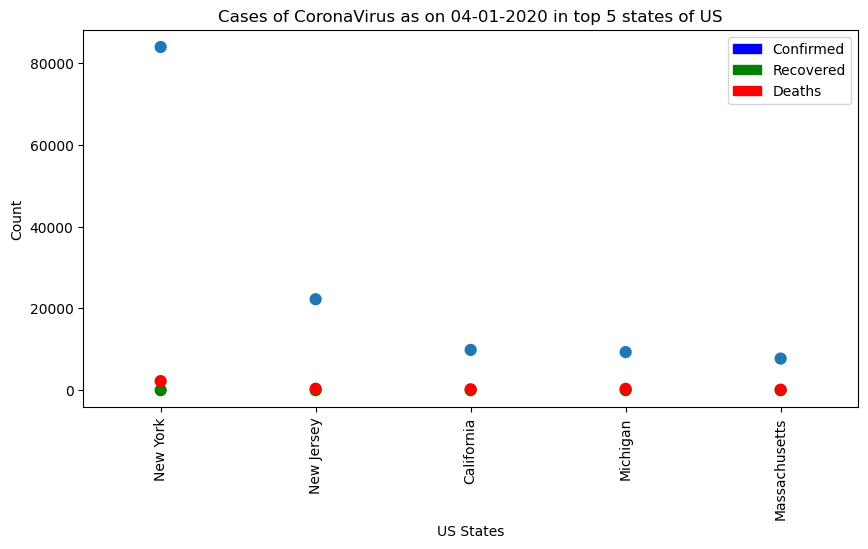

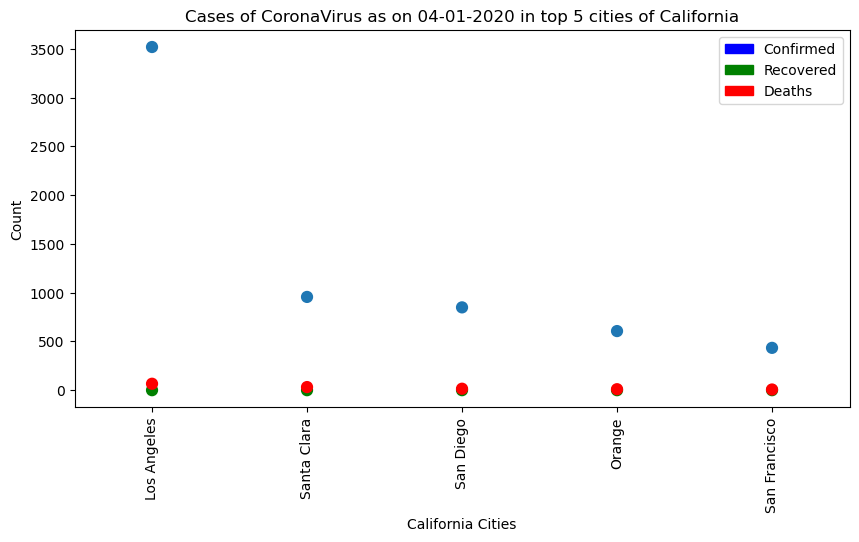

In [7]:
COVID_DATA_df = importfiles()
US_COVID_DATA_df = cities_usa_importfiles()
country_wise_count_plot(COVID_DATA_df)
country_wise_count_plot(COVID_DATA_df, country='US')
country_wise_count_plot(US_COVID_DATA_df, country='US',state='California')

# Plotting The Timeline of CoronaVirus Across The Globe

In [8]:
def timeline_total(COVID_DATA_df, country=None, state=None):
    if state is not None:
        df = COVID_DATA_df[COVID_DATA_df['Province/State']==state]
    elif country is not None:
        df = COVID_DATA_df[COVID_DATA_df['Country/Region']==country]
    else:
        df = COVID_DATA_df
    
    df = df.sort_values(by=['Last Update'])
    df = df.groupby(['Last Update']).agg({'Confirmed':['sum'], 'Recovered':['sum'], 'Deaths':['sum']})
    df = df.reset_index()
    df.columns = df.columns.droplevel(1)
    df = df.sort_values(by=['Last Update'])
    return df

In [9]:
def plot_timeline_total(COVID_DATA_df, country=None, state=None):
    if state is not None:
        selection_column = 'City'
        df = timeline_total(COVID_DATA_df, country, state)
        x_label_value = state + ' State'
    elif country is not None:
        selection_column = 'Province/State'
        df = timeline_total(COVID_DATA_df, country)
        x_label_value = country + ' Country'
    else:
        selection_column = 'Country/Region'
        df = timeline_total(COVID_DATA_df)
        x_label_value = 'World'
        
    plt.figure(figsize=(10,5), dpi=100)
    line_plot_ax = sns.lineplot(x='Last Update',y='Confirmed',data=df)
    line_plot_ax = sns.lineplot(x='Last Update',y='Deaths',data=df, color='red', ax = line_plot_ax)
    line_plot_ax = sns.lineplot(x='Last Update',y='Recovered',data=df, color='green', ax = line_plot_ax)
    line_plot_ax.set_title('Cases of Corona Virus in '+ x_label_value)
    line_plot_ax.set_xlabel('Time')
    line_plot_ax.set_ylabel('Count')
    
    plt.xticks(rotation=90)

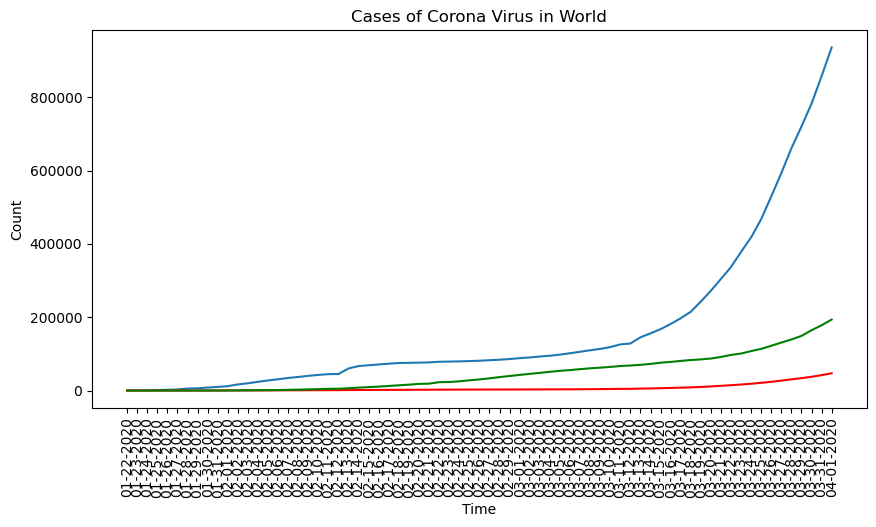

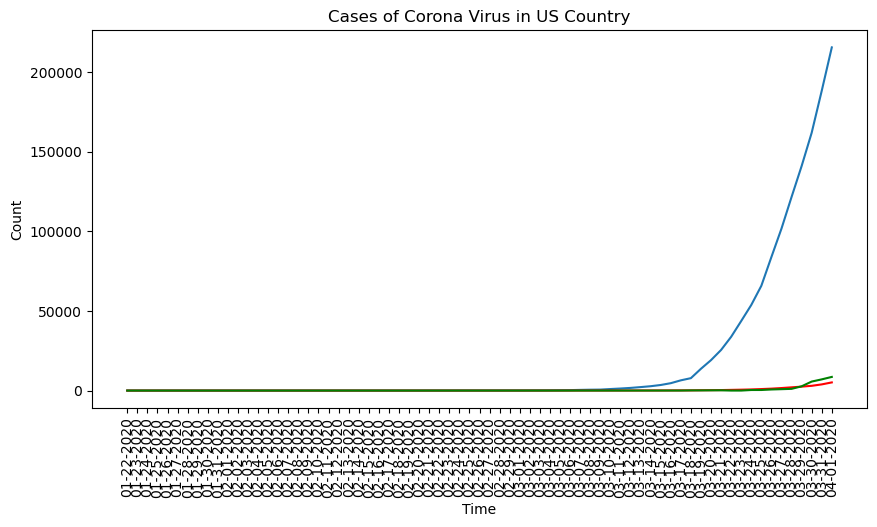

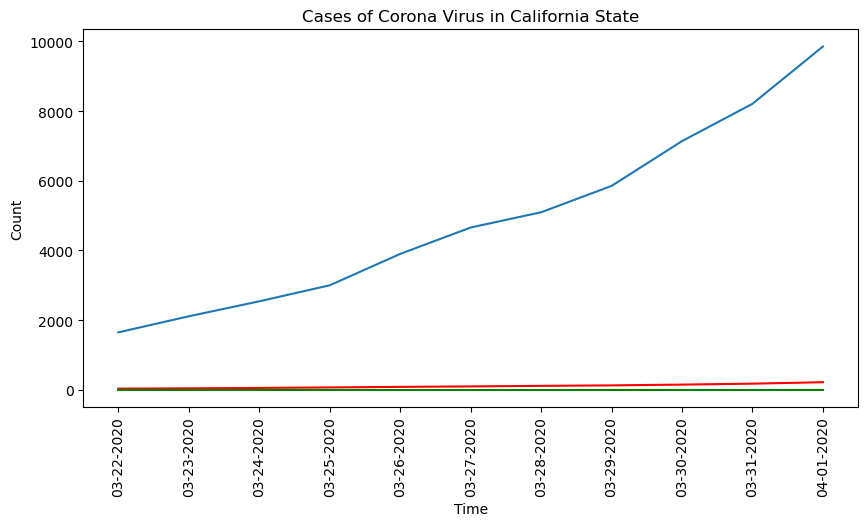

In [10]:
plot_timeline_total(COVID_DATA_df)
plot_timeline_total(COVID_DATA_df, country='US')
plot_timeline_total(US_COVID_DATA_df, country='US',state='California')

# Plotting Timeline of 10 Countries/States/Cities with Highest CoronaVirus Cases

In [11]:
def timeline_countrywise(COVID_DATA_df, country=None, state=None):
    if state is not None:
        selection_column = 'City'
        temp_df = country_wise_count(COVID_DATA_df, country,state) 
    elif country is not None:
        selection_column = 'Province/State'
        temp_df = country_wise_count(COVID_DATA_df, country)
    else:
        selection_column = 'Country/Region'
        temp_df = country_wise_count(COVID_DATA_df)
    
    top_countries = temp_df[selection_column].tolist()
    df = COVID_DATA_df[COVID_DATA_df[selection_column].isin(top_countries)]
    df = df.sort_values(by=[selection_column, 'Last Update'])
    df = df.groupby([selection_column, 'Last Update']).agg({'Confirmed':['sum'], 'Recovered':['sum'], 'Deaths':['sum']})
    df = df.reset_index()
    df.columns = df.columns.droplevel(1)
    df = df.sort_values(by=['Last Update'])
    return df

In [12]:
def line_plot_initatizing_data(COVID_DATA_df, country, state):
    if state is not None:
        selection_column = 'City'
        df = timeline_countrywise(COVID_DATA_df, country, state)
        x_label_value = state + ' Cities'
    elif country is not None:
        selection_column = 'Province/State'
        df = timeline_countrywise(COVID_DATA_df, country)
        x_label_value = country + ' States'
    else:
        selection_column = 'Country/Region'
        df = timeline_countrywise(COVID_DATA_df)
        x_label_value = 'Countries'
        
    return selection_column, df, x_label_value

In [13]:
def line_plotting_function(df,selection_column,x_label_value, x_value, y_value):
    plt.figure(figsize=(10,5), dpi=100)
    line_plot_ax = sns.lineplot(x=x_value,y=y_value,data=df,hue=selection_column)
    line_plot_ax.set_title(y_value + ' Cases of Corona Virus in top 5 ' + x_label_value)
    line_plot_ax.set_xlabel('Time')
    line_plot_ax.set_ylabel('Count')
    line_plot_ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1, fontsize=8)
    plt.xticks(rotation=90)

In [14]:
def plot_timeline_countrywise_CONFIRMED(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'Confirmed')

In [15]:
def plot_timeline_countrywise_RECOVERED(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'Recovered')

In [16]:
def plot_timeline_countrywise_DEATHS(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'Deaths')

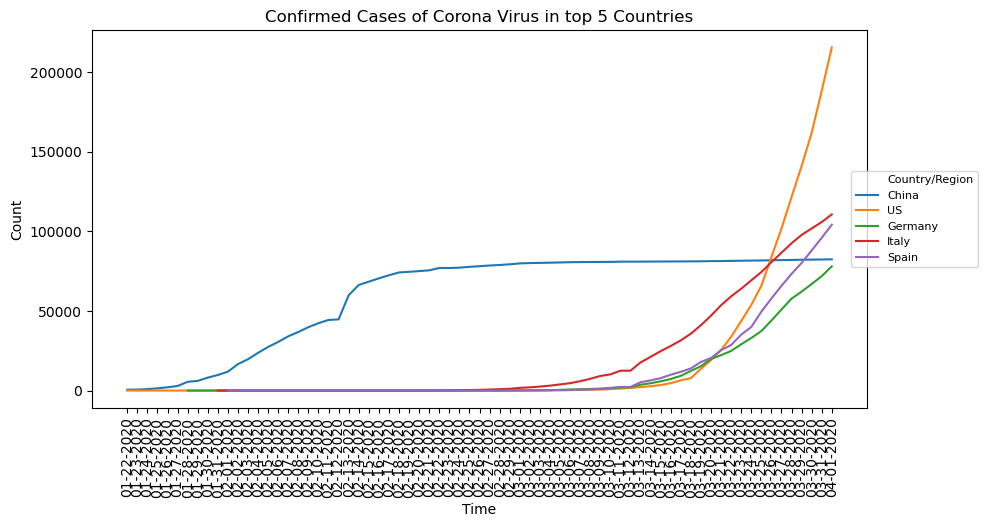

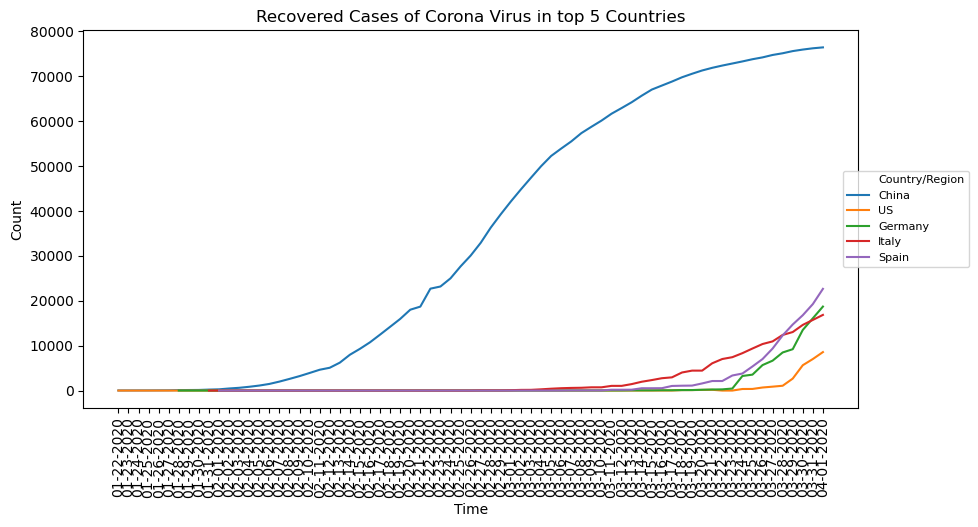

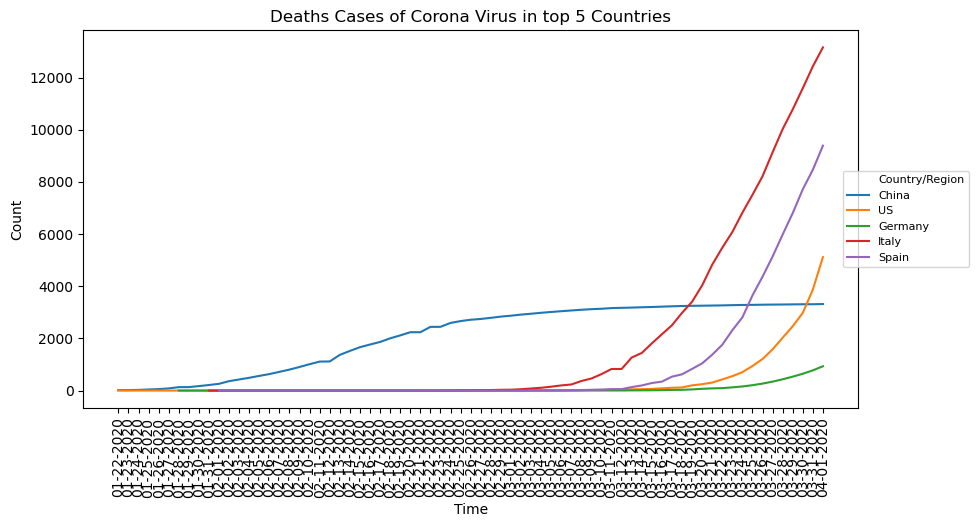

In [17]:
plot_timeline_countrywise_CONFIRMED(COVID_DATA_df)
plot_timeline_countrywise_RECOVERED(COVID_DATA_df)
plot_timeline_countrywise_DEATHS(COVID_DATA_df)

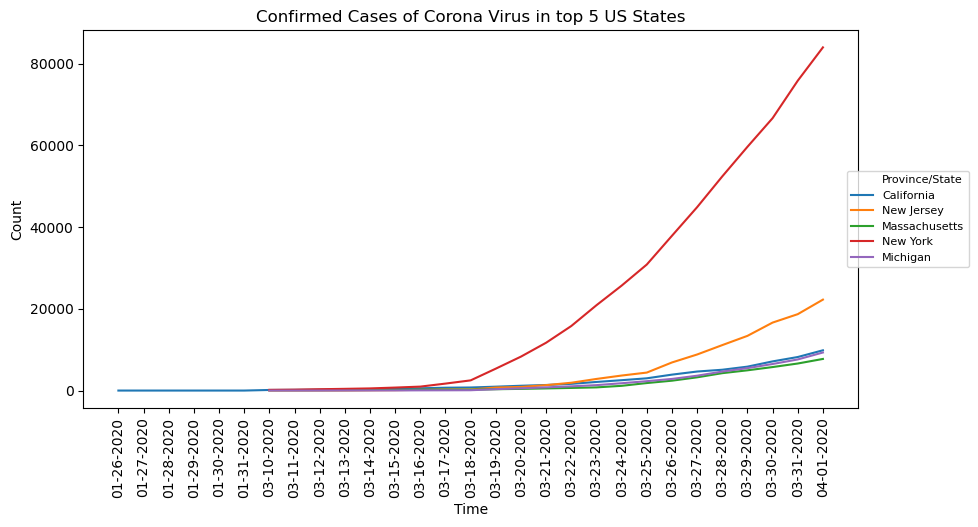

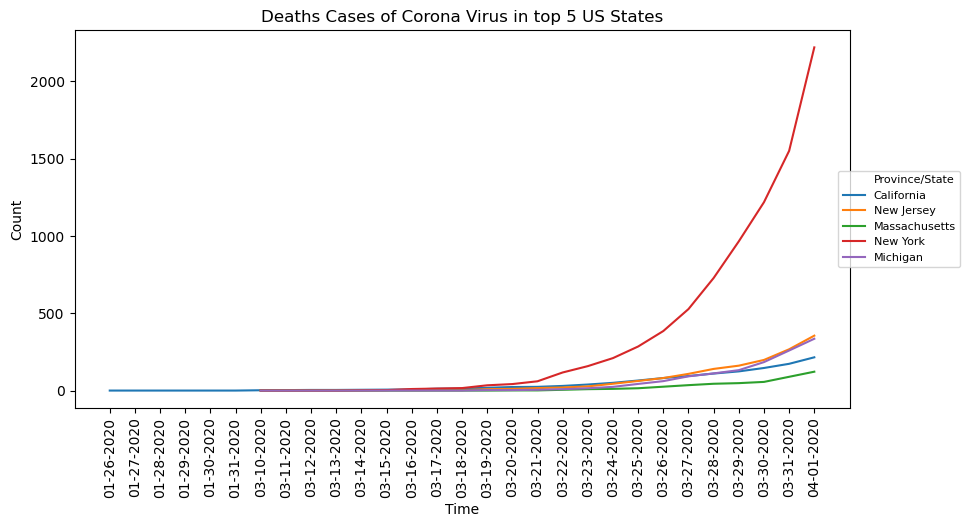

In [18]:
plot_timeline_countrywise_CONFIRMED(COVID_DATA_df, country='US')
plot_timeline_countrywise_DEATHS(COVID_DATA_df, country='US')

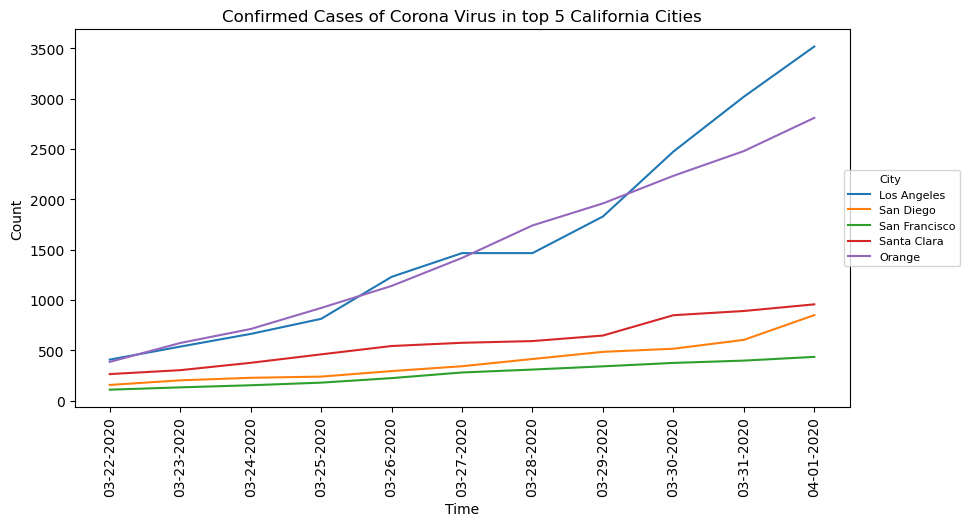

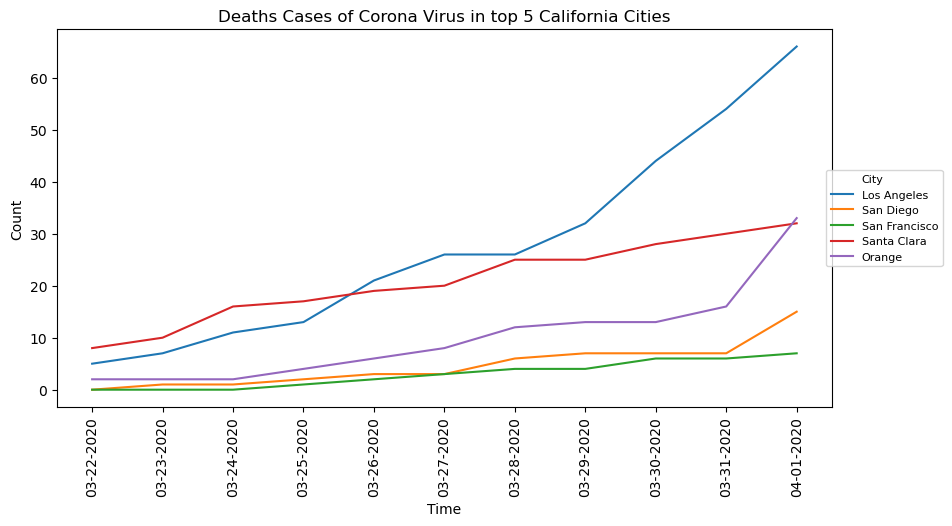

In [19]:
plot_timeline_countrywise_CONFIRMED(US_COVID_DATA_df, country='US',state='California')
plot_timeline_countrywise_DEATHS(US_COVID_DATA_df, country='US',state='California')

# Viewing the Data of Top 10 Countries Impacted by CoronaVirus Cases

In [20]:
df = country_wise_count(COVID_DATA_df)
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered
168,US,215417.0,5116.0,8566.0
84,Italy,110574.0,13155.0,16847.0
153,Spain,104118.0,9387.0,22647.0
36,China,82381.0,3316.0,76409.0
65,Germany,77981.0,931.0,18700.0


# Viewing the Data of CoronaVirus Cases Across the Globe For Past 5 Days

In [21]:
df = timeline_total(COVID_DATA_df)
df.tail()

,Last Update,Confirmed,Recovered,Deaths
66,03-28-2020,660706.0,139415.0,30652.0
67,03-29-2020,720117.0,149082.0,33925.0
68,03-30-2020,782365.0,164566.0,37582.0
69,03-31-2020,857487.0,178034.0,42107.0
70,04-01-2020,935817.0,193700.0,47208.0


# Plotting the Daily New Cases of CoronaVirus for Top 10 Countries/States/Cities

In [22]:
def timeline_new_cases_countrywise(COVID_DATA_df, country=None, state=None):
    if state is not None:
        selection_column = 'City'
        df = timeline_countrywise(COVID_DATA_df, country, state)
        top_countries = country_wise_count(COVID_DATA_df, country, state)[selection_column].tolist()
    elif country is not None:
        selection_column = 'Province/State'
        df = timeline_countrywise(COVID_DATA_df, country)
        top_countries = country_wise_count(COVID_DATA_df, country)[selection_column].tolist()
    else:
        selection_column = 'Country/Region'
        df = timeline_countrywise(COVID_DATA_df)
        top_countries = country_wise_count(COVID_DATA_df)[selection_column].tolist()
    
    #Getting the differences
    diff_df = pd.DataFrame(columns = [selection_column, 'Last Update', 'Confirmed', 'Deaths', 'Recovered'])
    for top_country in top_countries:
        temp_df = df[df[selection_column] ==top_country]
        temp_df["New Confirmed"] = temp_df["Confirmed"].diff(periods=1)
        temp_df["New Recovered"] = temp_df["Recovered"].diff(periods=1)
        temp_df["New Deaths"] = temp_df["Deaths"].diff(periods=1)
        diff_df = pd.concat([diff_df,temp_df], ignore_index=True, axis=0, sort=True)
    
    diff_df = diff_df.sort_values(by=['Last Update'])
    diff_df = diff_df.fillna(0)
    return diff_df

In [23]:
def line_plot_new_cases_initatizing_data(COVID_DATA_df, country, state):
    if state is not None:
        selection_column = 'City'
        df = timeline_new_cases_countrywise(COVID_DATA_df, country, state)
        x_label_value = state + ' Cities'
    elif country is not None:
        selection_column = 'Province/State'
        df = timeline_new_cases_countrywise(COVID_DATA_df, country)
        x_label_value = country + ' States'
    else:
        selection_column = 'Country/Region'
        df = timeline_new_cases_countrywise(COVID_DATA_df)
        x_label_value = 'Countries'
        
    return selection_column, df, x_label_value

In [24]:
def plot_timeline__new_cases_countrywise_CONFIRMED(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_new_cases_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'New Confirmed')

In [25]:
def plot_timeline__new_cases_countrywise_RECOVERED(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_new_cases_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'New Recovered')

In [26]:
def plot_timeline__new_cases_countrywise_DEATHS(COVID_DATA_df, country=None, state=None):
    selection_column, df, x_label_value = line_plot_new_cases_initatizing_data(COVID_DATA_df, country, state)
    
    line_plotting_function(df,selection_column,x_label_value, 'Last Update', 'New Deaths')

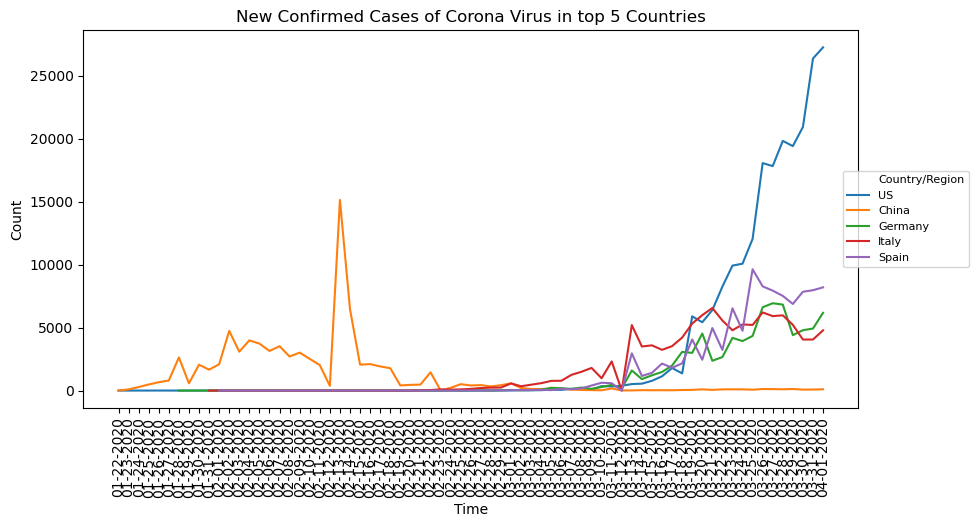

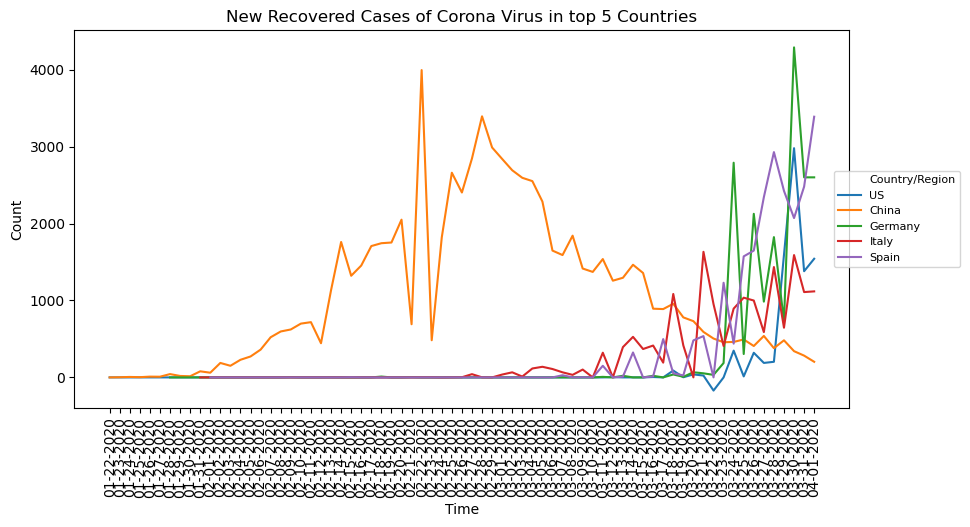

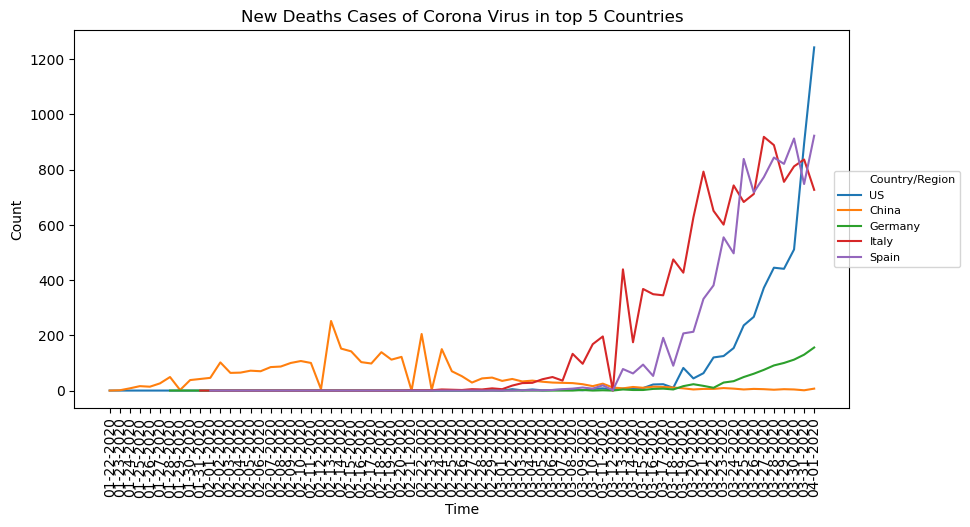

In [27]:
plot_timeline__new_cases_countrywise_CONFIRMED(COVID_DATA_df)
plot_timeline__new_cases_countrywise_RECOVERED(COVID_DATA_df)
plot_timeline__new_cases_countrywise_DEATHS(COVID_DATA_df)

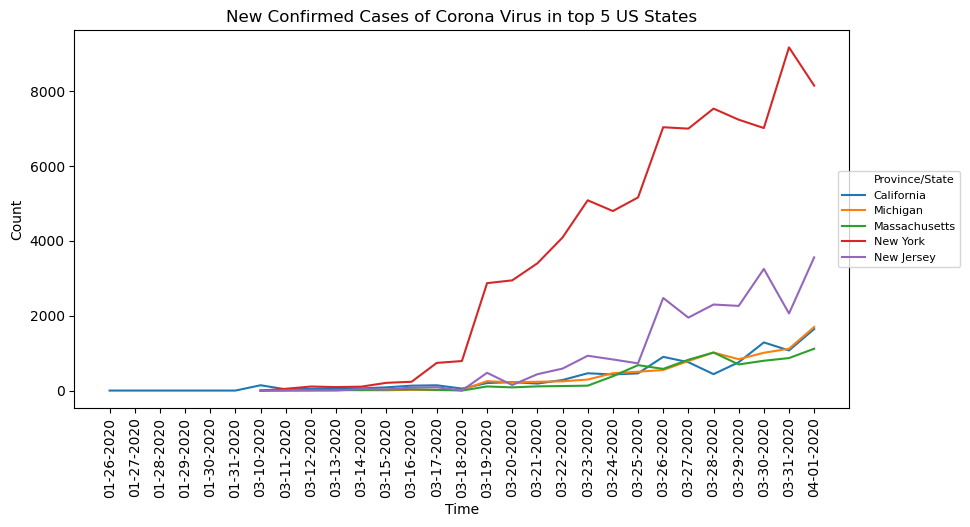

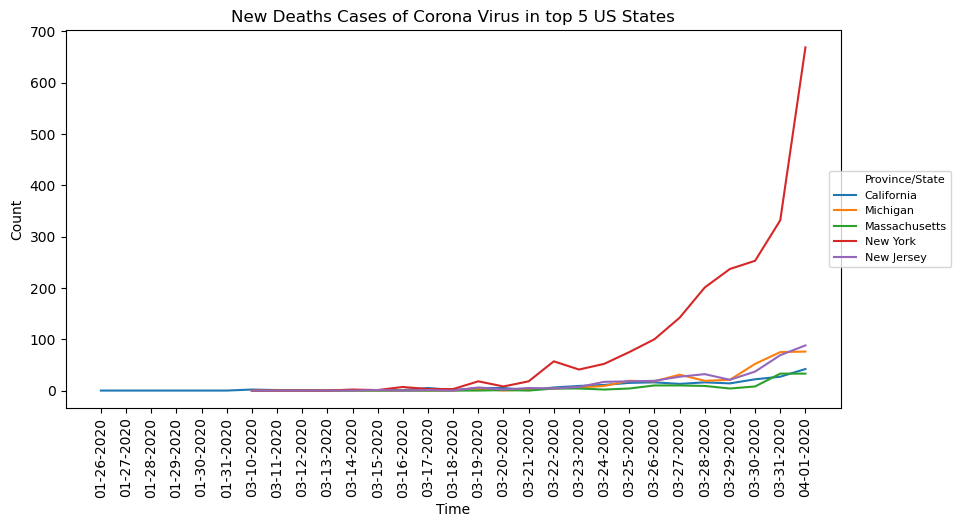

In [28]:
plot_timeline__new_cases_countrywise_CONFIRMED(COVID_DATA_df,'US')
plot_timeline__new_cases_countrywise_DEATHS(COVID_DATA_df,'US')

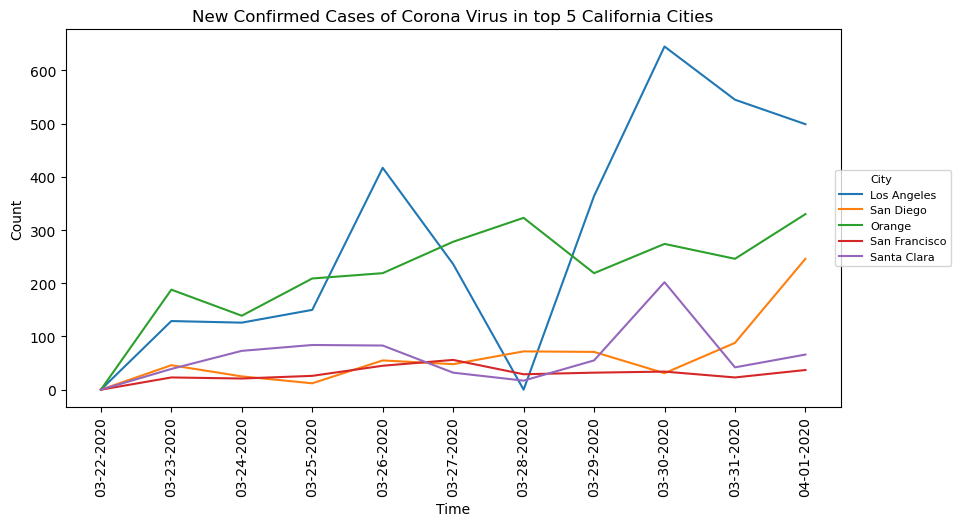

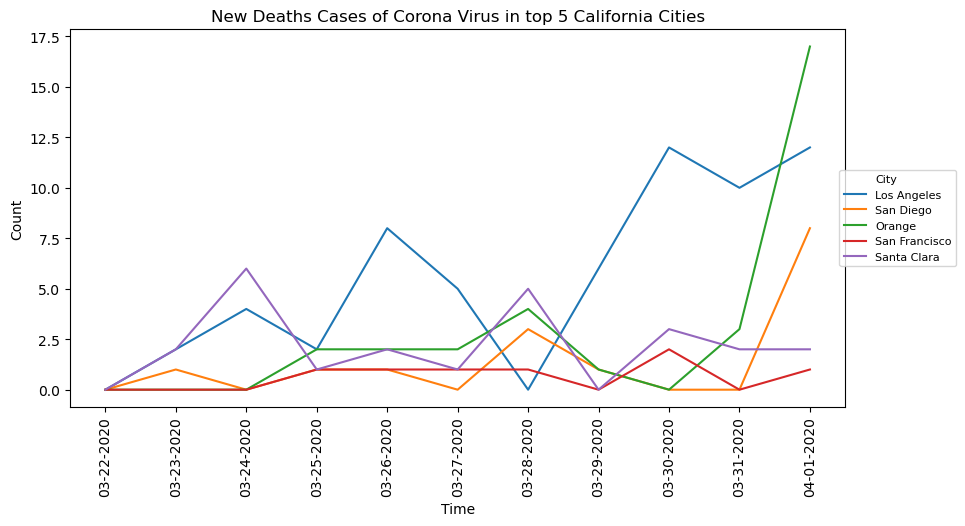

In [29]:
plot_timeline__new_cases_countrywise_CONFIRMED(US_COVID_DATA_df, country='US',state='California')
plot_timeline__new_cases_countrywise_DEATHS(US_COVID_DATA_df, country='US',state='California')

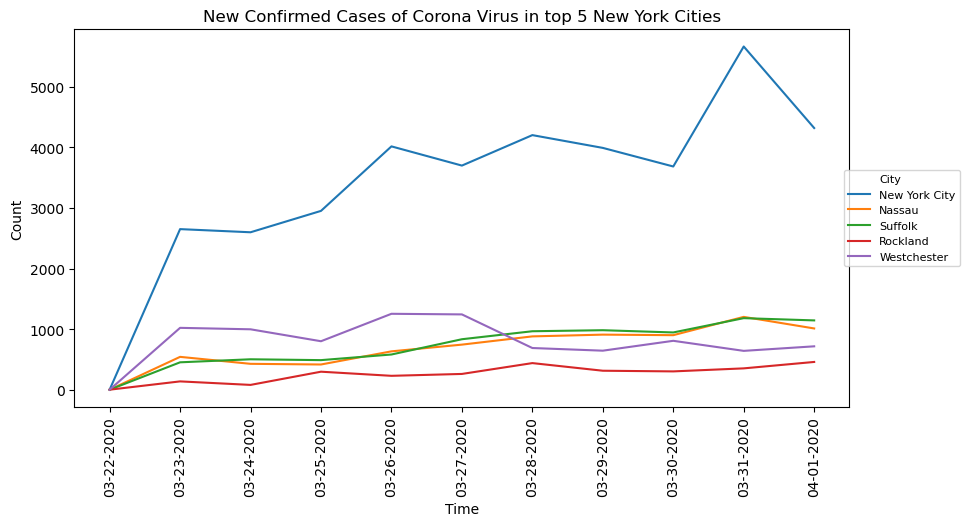

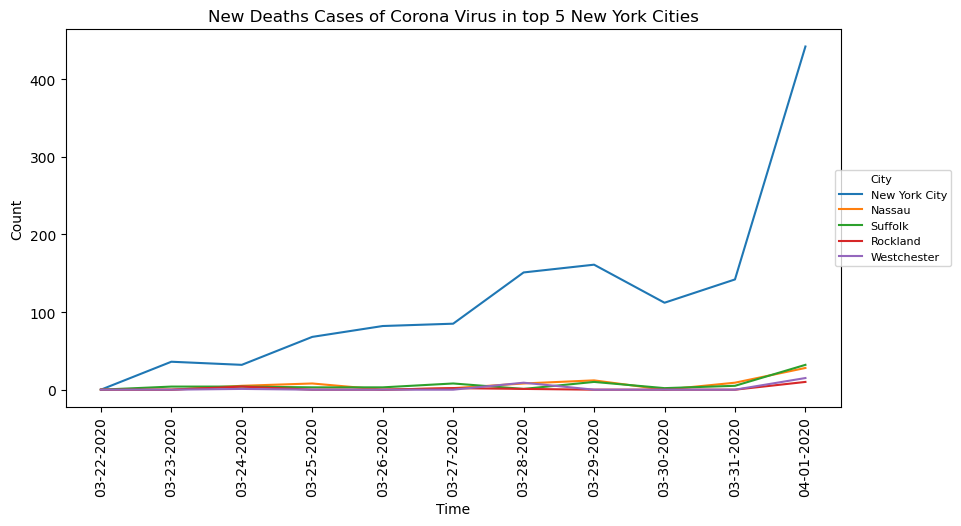

In [30]:
plot_timeline__new_cases_countrywise_CONFIRMED(US_COVID_DATA_df, country='US',state='New York')
plot_timeline__new_cases_countrywise_DEATHS(US_COVID_DATA_df, country='US',state='New York')